##### Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [108]:
import numpy as np
import scipy.stats as stat

## Given
sample_mean = 50
sample_std = 5
alpha = 0.05

## Assumption
sample_size = 30

## Calculate Z score for two-tailed 95% confidence interval (0.025, 0.975)
z = stat.norm.ppf(1 - (alpha/2))

## Calculate margin of error
margin_of_error = z * (sample_std / np.sqrt(sample_size))

## Calculate upper and lower limits
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error

##Result Interpretation
print(f'95% confiidence interval for true population is - {(lower_limit, upper_limit)}')

95% confiidence interval for true population is - (48.210805856282846, 51.789194143717154)


##### Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [109]:
## Given 
expected_proportion = [0.2, 0.2, 0.2, 0.1, 0.1, 0.2]

## Observed (Assumption)
# observed_data = [6, 7, 5, 2, 5, 5,]
observed_data = [9, 2, 7, 2, 7, 3,]
expected_data = [x * sum(observed_data) for x in expected_proportion]

## Chi Square goodness of fit
chisqure_test_static, p_value = stat.chisquare(observed_data, expected_data)
print(f"ChiSquare Test Static = {chisqure_test_static}")

significance = 0.05
dof = len(expected_proportion) - 1

## Calculate critical value as:
critical_value = stat.chi2.ppf((1-significance), dof)
print(f"Critical Value = {critical_value}")

if chisqure_test_static > critical_value:
    print(f"Reject the Null Hypothesis H(0) at {significance} significance. The distribution of colors of M&Ms in a bag matches the expected distribution")
else:
    print(f"Fail to reject the Null Hypothesis H(0) at {significance} significance. The distribution of colors of M&Ms in a bag doesn't matches the expected distribution")

ChiSquare Test Static = 11.5
Critical Value = 11.070497693516351
Reject the Null Hypothesis H(0) at 0.05 significance. The distribution of colors of M&Ms in a bag matches the expected distribution


##### Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:
|  |Group A|Group B|
|:-|:-------:|:-------:|
|Outcome 1|20|15|
|Outcome 2|10|25|
|Outcome 3|15|20|
##### Interpret the results of the test.

In [110]:
# Given contingency table
contingency_table = np.array([[20, 15],
                              [10, 25],
                              [15, 20]])

# Perform the Chi-Square test for independence
chi2, p, dof, expected = stat.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


Chi-Square Statistic: 5.833333333333334
P-value: 0.05411376622282158
Degrees of Freedom: 2
Expected Frequencies:
 [[15. 20.]
 [15. 20.]
 [15. 20.]]


* **Interpretation**:
    1. **Expected Freaquencies**: These are the values that would be expected in each cell of the table if there was no association between the variables. In this case, all the expected frequencies are the same: 15 for the first column and 20 for the second column.
    2. **Chi-Square Statistic**: The chi-square statistic value (5.83) indicates that there is some difference between the observed and expected frequencies in the contingency table. However, the magnitude of this difference might not be strong enough to conclude a significant association between the variables.
    3. **P-Value**: The p-value (0.054) is slightly above the common significance level of 0.05. This suggests that the observed association between the two variables (Group and Outcome) in the contingency table may not be statistically significant at the conventional 0.05 level. 
___

##### Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [111]:
## Given
sample_size = 500
number_of_smokers = 60
alpha = 0.05 # Since confidence interval is 95%

## Lets call proportion of smokers as p
p = number_of_smokers / sample_size

## Calculate critical value (Z-score) for tw-tailed test at 0.05 significance
critical_value = stat.norm.ppf(1 - (alpha / 2))

## Calculate standard error of proportion
standard_error = np.sqrt((p * (1 - p)) / sample_size)

## Calculatre Margin of error as critical value * standard error
margin_of_error = critical_value * standard_error

## Calculate lower and upper limit of the interval
lower_limit = p - margin_of_error
upper_limit = p + margin_of_error

print(f"The 95% confidence interval for the true proportion of individuals in the population who smoke is:\n[{lower_limit}, {upper_limit}]")

The 95% confidence interval for the true proportion of individuals in the population who smoke is:
[0.09151638887130707, 0.1484836111286929]


In [112]:
## Option 2 using stats binom.interval function:
confidence_interval = stat.binom.interval(1 - alpha, n=sample_size, p=number_of_smokers / sample_size)
print(confidence_interval)

(46.0, 75.0)


##### Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [113]:
## Given
sample_mean = 75
sample_std = 12
confidence = 0.9
significance = 1 - confidence

## Assume sample size to be 30
sample_size = 30

In [114]:
## Method 1 - Calculate by formula

# 1. Critical Value
critical_value = stat.norm.ppf(1 - (significance/2))

# 2. Standard Error
standard_error = sample_std / np.sqrt(sample_size)

# 3. Margin of Error 
margin_of_error = critical_value * standard_error

# 4. Calculate lower and upper limit
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error

print(f" 90% confidence interval from sample mean and std : [{lower_limit}, {upper_limit}]")


 90% confidence interval from sample mean and std : [71.39630625889797, 78.60369374110203]


In [115]:
## Method 2 - stat.norm.interval function
lower_limit, upper_limit = stat.norm.interval(1 - 0.1, loc=sample_mean, scale=sample_std/np.sqrt(sample_size))
print(f" 90% confidence interval from sample mean and std : [{lower_limit}, {upper_limit}]")

 90% confidence interval from sample mean and std : [71.39630625889797, 78.60369374110203]


* **Interpretation**: 
    - At 90% confidence the true mean of the population will be within 71.39 and 78.60.
    - If we draw multiple sample from the population 90% of the time the mean will be in this range.
___

##### Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

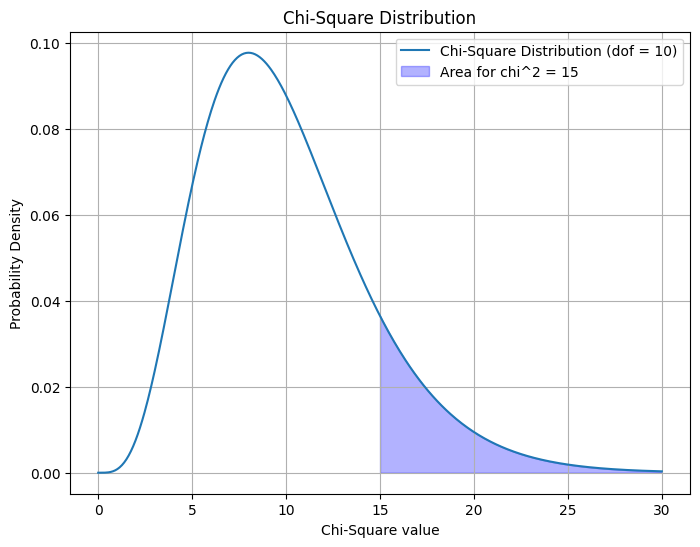

In [116]:
import matplotlib.pyplot as plt

# set degree of freedom
dof = 10

# Create a range of chi-square values
x = np.linspace(0, 30, 500)

# Calculate chi-square probability density function
chi_square_pdf = stat.chi2.pdf(x, dof)
# chi_square_pdf_2 = stat.chi2.pdf(x, 5)

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(x, chi_square_pdf, label=f"Chi-Square Distribution (dof = {dof})")
# plt.plot(x, chi_square_pdf_2, label=f"Chi-Square Distribution (dof = 5)")

# Shade the are corresponding to the chi-square statistic of 15
x_fill = np.linspace(15, 30, 500)
plt.fill_between(x_fill, stat.chi2.pdf(x_fill, dof), color='blue', alpha=0.3, label='Area for chi^2 = 15')

# Label the axes and legends
plt.xlabel("Chi-Square value")
plt.ylabel("Probability Density")
plt.title("Chi-Square Distribution")
plt.legend()

# Show plot
plt.grid()
plt.show()

##### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [117]:
# Given
sample_size = 1000
preferred_coke = 520
confidence = 0.99
alpha = 1 - confidence

# Calculate the tru proportion interval with binom interval function
lower_limit, upper_limit = stat.binom.interval(1 - alpha, n=sample_size, p=preferred_coke / sample_size)
print(f"99% Confidence interval for tru population proportion of people who prefer coke : [{lower_limit}, {upper_limit}]")

99% Confidence interval for tru population proportion of people who prefer coke : [479.0, 561.0]


##### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [118]:
# GIVEN
sample_size = 100
observed_tails = 45
observed_heads = sample_size - observed_tails
expected_heads = expected_tails = sample_size / 2
significance = 0.05
df = 1

chisquare_test, p_value = stat.chisquare([observed_tails, observed_heads], [expected_heads, expected_tails])

critical_value = stat.chi2.ppf(1-significance, df)

# Print the results
print("Chi-Square Statistic:", chisquare_test)
print("P-value:", p_value)
print("Critical value:", critical_value)

Chi-Square Statistic: 1.0
P-value: 0.31731050786291115
Critical value: 3.841458820694124


* **Interpretation**: Since our Chi-Square Statistic is less than the Critical value
    - The chi-square goodness of fit test does not provide strong evidence to reject the null hypothesis that the coin is fair.
    - The p-value suggests that the observed distribution of outcomes (tails and heads) is reasonably consistent with what would be expected for a fair coin.
___

##### Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis. Use a significance level of 0.05.
||Lung Cancer : Yes|Lung Cancer : No|
|:-|:-------------:|:--------------:|
|Smoker|60|140|
|Non Smoker|30|170|

In [119]:
# Given contingency table
contingency_table = np.array([[60, 140],
                              [30, 170]])

# Perform the Chi-Square test for independence
chi2, p, dof, expected = stat.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 12.057347670250895
P-value: 0.0005158863863703744
Degrees of Freedom: 1
Expected Frequencies:
 [[ 45. 155.]
 [ 45. 155.]]


* **Interpretation**:
    1. **Expected Freaquencies**: These are the values that would be expected in each cell of the table if there was no association between smoking status and lung cancer diagnosis. 
    2. **Chi-Square Statistic**: The calculated Chi-Square statistic (12.06) indicates a considerable difference between the observed frequencies and the expected frequencies under the assumption of independence.
    3. **P-Value**: The very small p-value (0.00052) suggests strong evidence against the null hypothesis. In other words, the observed association between smoking status and lung cancer diagnosis is unlikely to have occurred by chance, and there is a significant association between these two variables.
___

##### Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin. Use a significance level of 0.01.
||Milk Chocolate|Dark Chocolate|White Chocolate|
|:-|:-------------:|:--------------:|
|U.S.|200|150|150|
|U.K.|225|175|100|

In [120]:
# Given contingency table
contingency_table = np.array([[200, 150, 150],
                              [225, 175, 100]])

# Perform the Chi-Square test for independence
chi2, p, dof, expected = stat.chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

if (p < 0.01):
    print("""end=The observed p-value is very less if the hypothesis is true suggesting that this is unlikely to have occurred by chance, and there is a significant association between these two variables.""")
else:
    print("There is no significant association between the two parameters.")

Chi-Square Statistic: 13.393665158371041
P-value: 0.0012348168997745918
end=The observed p-value is very less if the hypothesis is true suggesting that this is unlikely to have occurred by chance, and there is a significant association between these two variables.


##### Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [121]:
## Given
sample_mean = 72
sample_std = 10
sample_size = 30
hypothetical_population_mean = 70
alpha = 0.05
dof = sample_size - 1

t_statistic = (sample_mean - hypothetical_population_mean) / (sample_std / np.sqrt(sample_size))

critical_t_value = stat.t.ppf(1 - alpha / 2, df=dof)

if abs(t_statistic) > critical_t_value:
    print("Reject the null hypothesis. The population mean is significantly different from 70.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference from 70.")

Fail to reject the null hypothesis. There is no significant difference from 70.
